In [143]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [144]:
# Task 1: Data Preparation
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [145]:
# Task 2: Exploratory Data Analysis (EDA)
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [147]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [148]:
# Check for missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


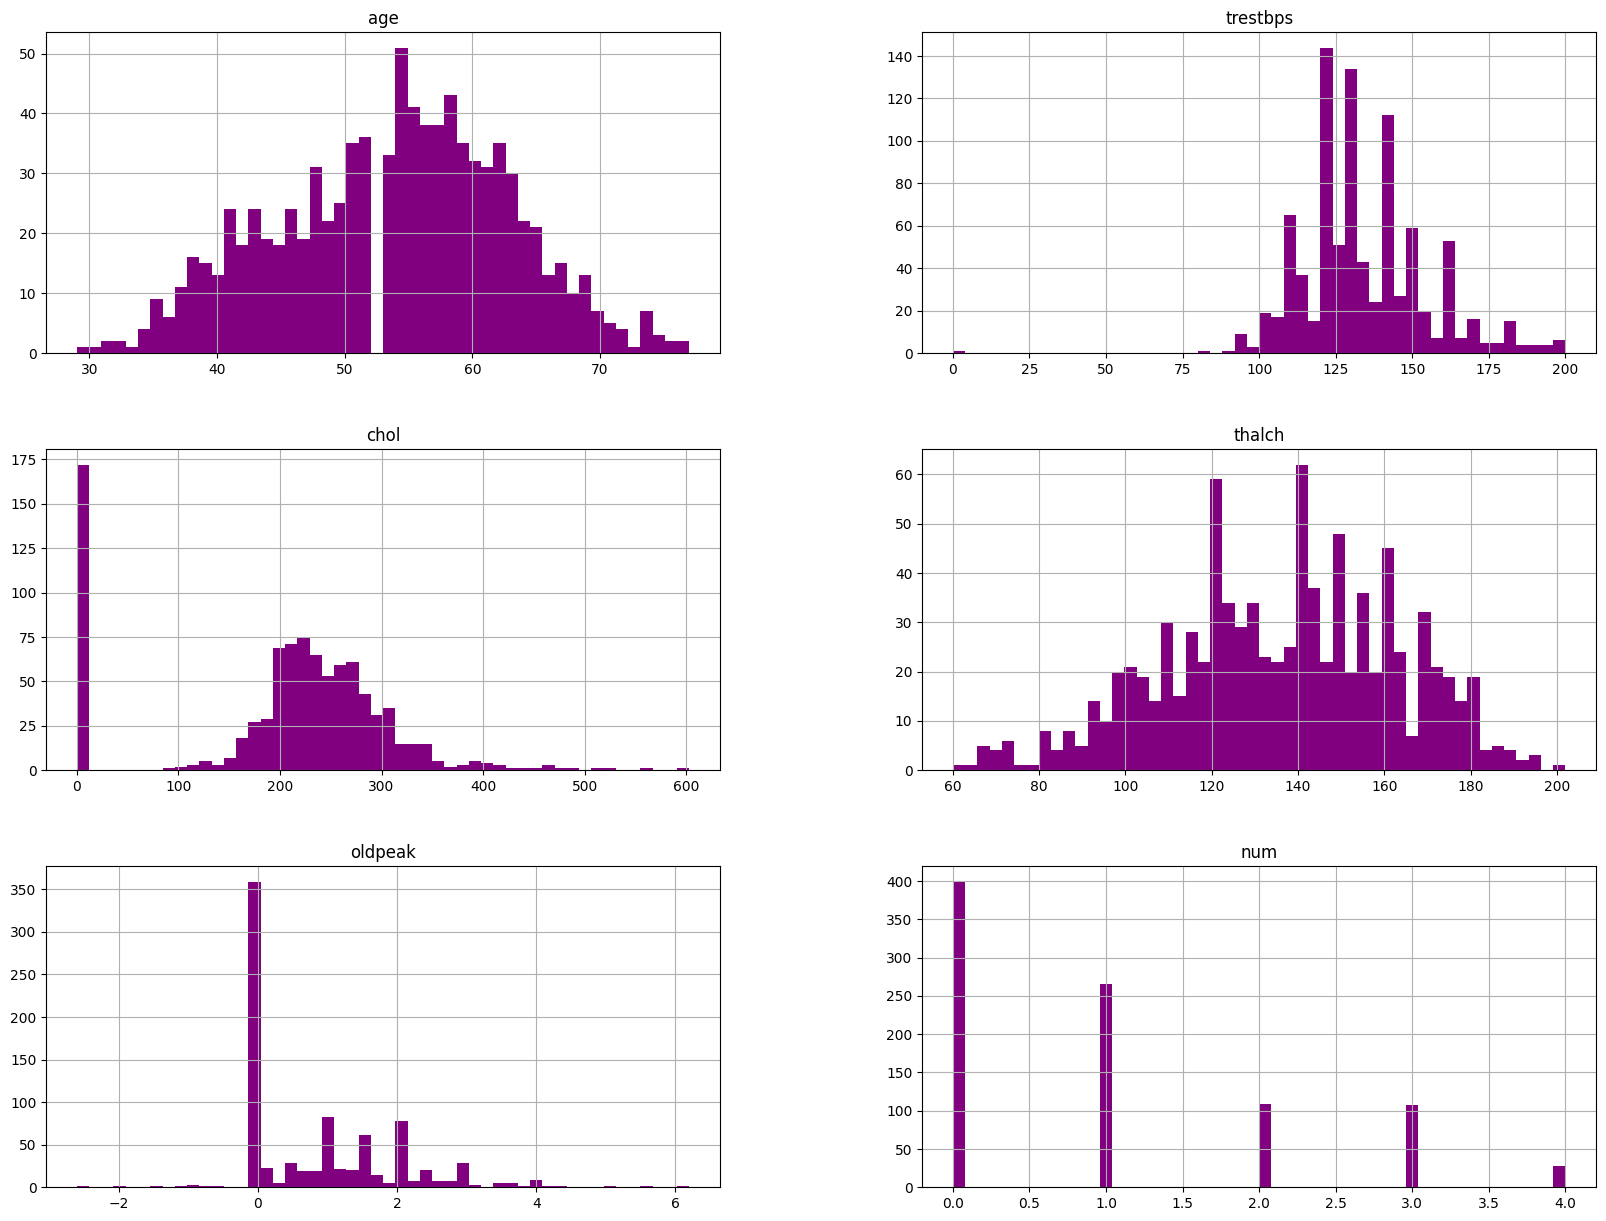

In [149]:
# Visualize feature distributions
data.hist(bins=50, figsize=(20, 15), color='purple')
plt.show()

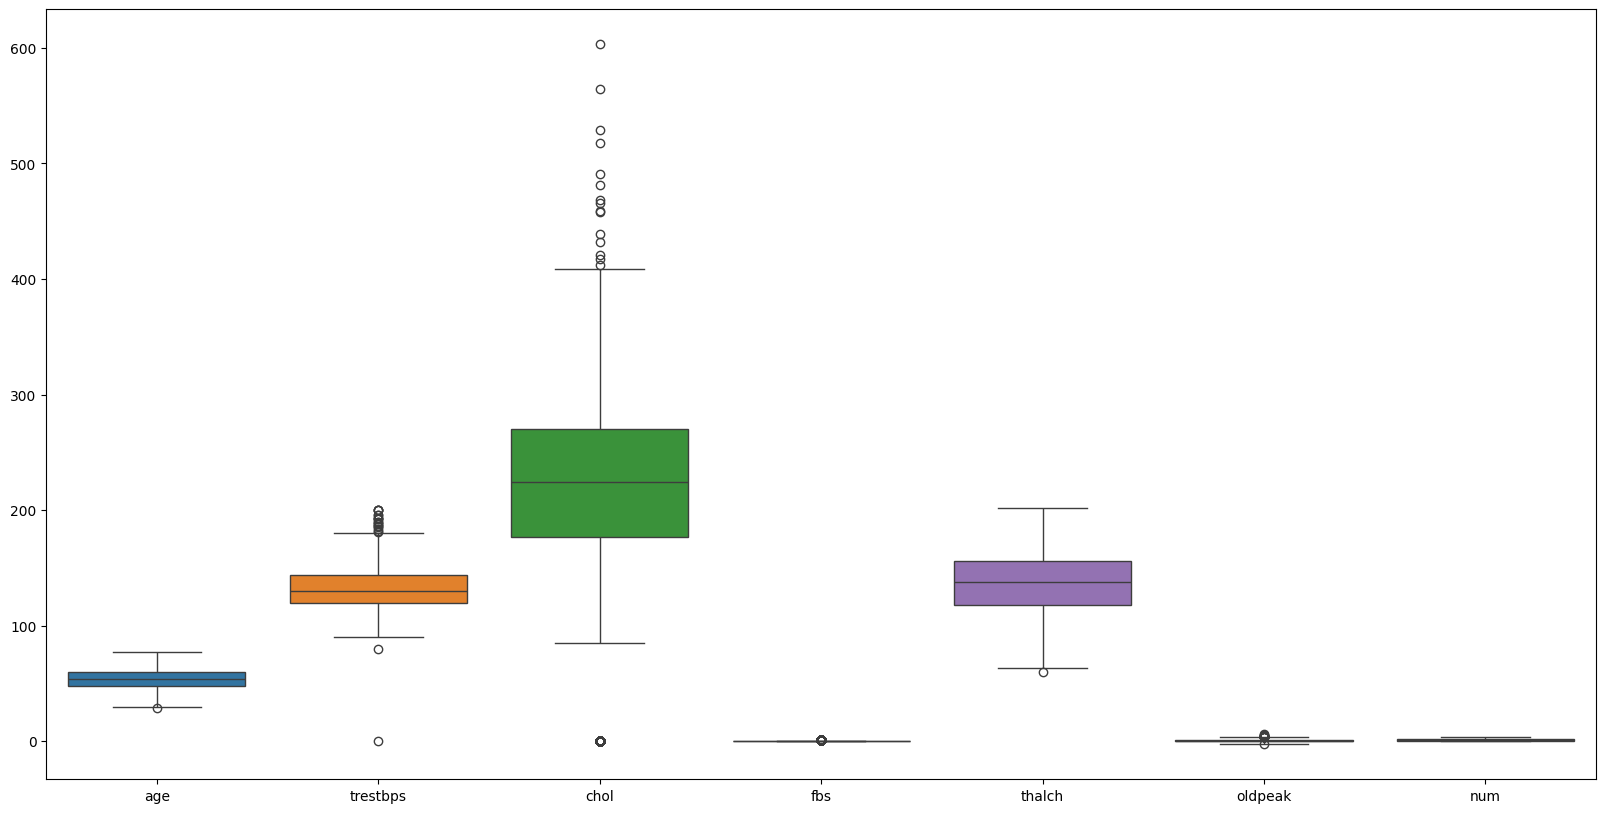

In [150]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.show()

In [151]:
# Task 3: Feature Engineering
# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['cp'] = le.fit_transform(data['cp'])
data['fbs'] = le.fit_transform(data['fbs'])
data['restecg'] = le.fit_transform(data['restecg'])
data['exang'] = le.fit_transform(data['exang'].astype(str))
data['slope'] = le.fit_transform(data['slope'])
data['thal'] = le.fit_transform(data['thal'].astype(str))
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,NaN,0,0,4


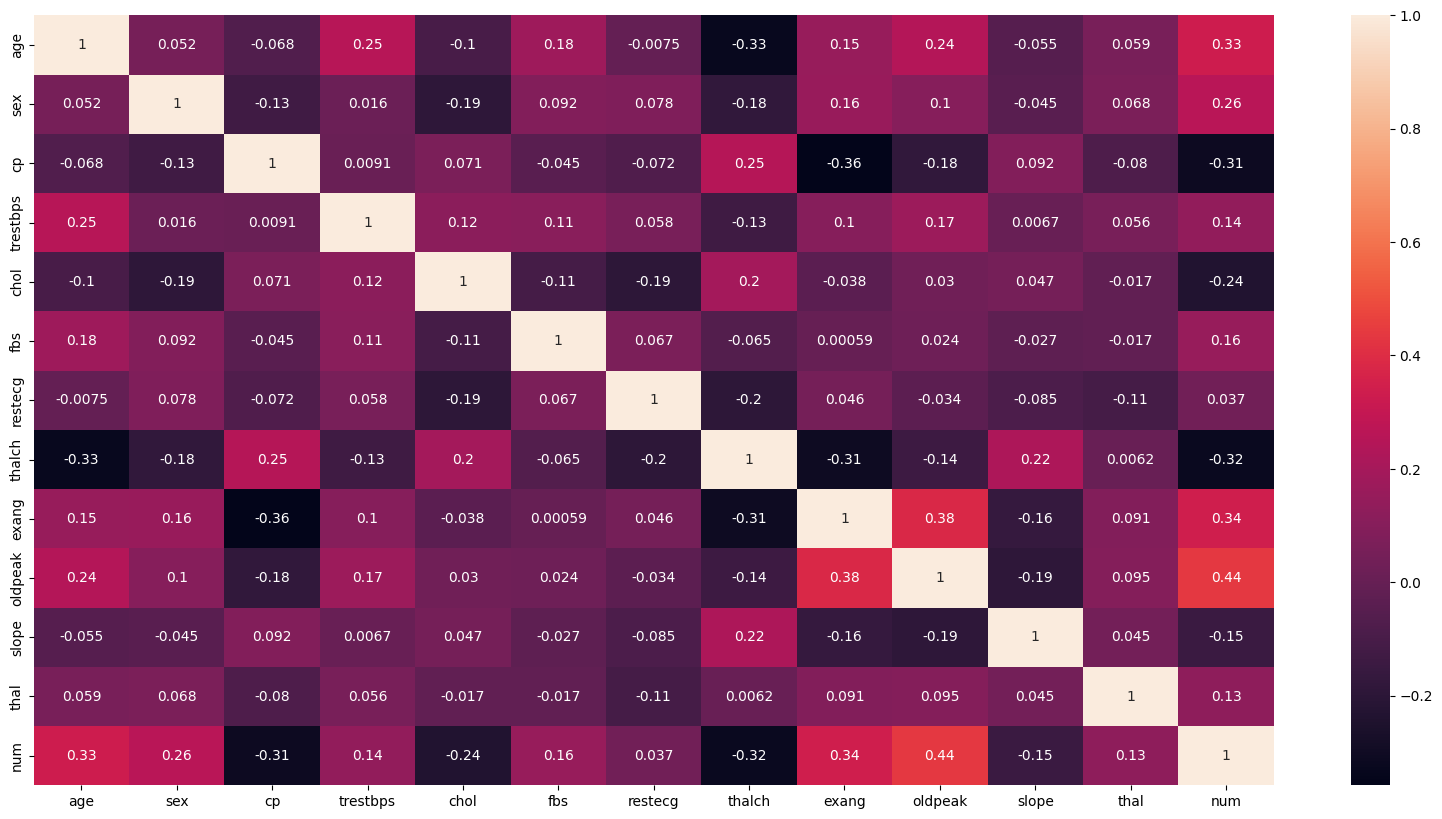

In [152]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [153]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [154]:
# Scale numerical features
scaler = StandardScaler()
data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,1,1.288612,0,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,1,-0.815249,1,0,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,1,-0.449360,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,1,-0.815249,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,3,0.556834,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,0,1,-0.595631,1,0.556834,2,2,4
904,0.896773,1,0,1.597292,-0.281021,0,2,-0.595631,3,1.928917,1,2,4
905,0.241249,1,2,1.793463,-1.798388,0,0,-0.483649,3,1.471556,0,1,4
906,0.241249,1,2,0.518352,0.058155,1,2,-1.155538,2,NaN,0,0,4


In [155]:
# Task 4: Decision Tree Classification
X = data.drop('num', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,1,1.288612,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,1,-0.815249,1,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,1,-0.449360,1,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,1,-0.815249,1,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,3,0.556834,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,0,1,-0.595631,1,0.556834,2,2
904,0.896773,1,0,1.597292,-0.281021,0,2,-0.595631,3,1.928917,1,2
905,0.241249,1,2,1.793463,-1.798388,0,0,-0.483649,3,1.471556,0,1
906,0.241249,1,2,0.518352,0.058155,1,2,-1.155538,2,NaN,0,0


In [156]:
y = data['num']
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 4, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 2,
       1, 1, 3, 0, 0, 3, 1, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2,
       0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4,
       1, 1, 3, 0, 0, 0])

In [159]:
# Calculate probabilities instead of predicted classes
y_prob = dt.predict_proba(X_test)

In [160]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1-score:', f1_score(y_test, y_pred, average='macro'))
print('ROC-AUC:', roc_auc_score(y_test, y_prob, multi_class='ovr')) # Use probabilities in roc_auc_score

Accuracy: 0.6208791208791209
Precision: 0.44659188955996554
Recall: 0.3638564261250976
F1-score: 0.3744307095789516
ROC-AUC: 0.5723021888963888


In [161]:
# Task 5: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [162]:
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [163]:
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.5385640056683987


In [164]:
# Task 6: Model Evaluation and Analysis

In [165]:
# Assuming you want to use the best estimator from grid_search
dt = grid_search.best_estimator_

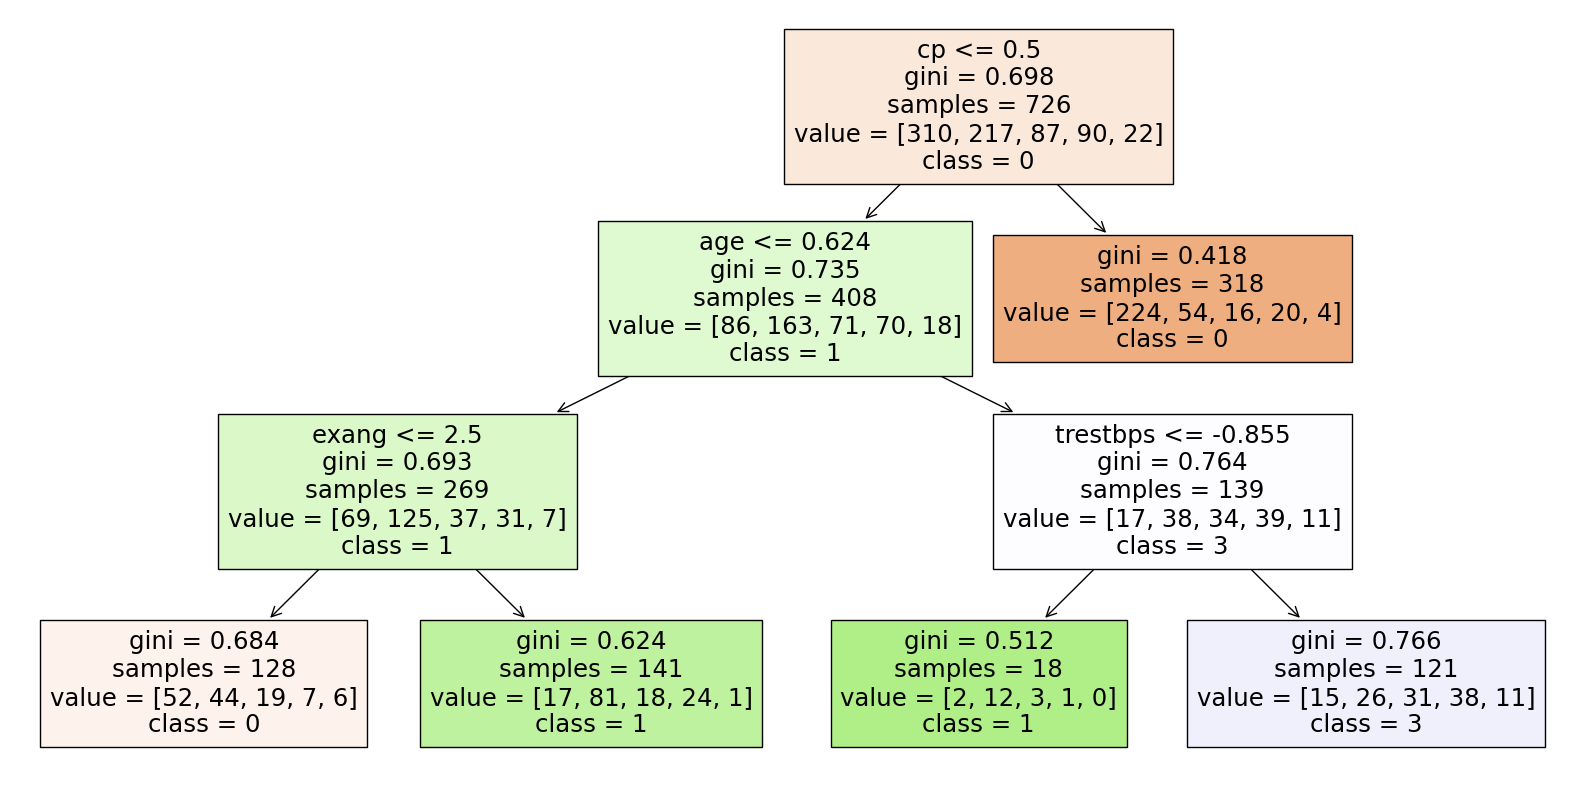

In [166]:
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names= [str(c) for c in dt.classes_], filled=True)
plt.show()

In [167]:
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)
dec_tree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [168]:
y_pred = dec_tree.predict(X_test)
y_pred

array([1, 1, 0, 2, 1, 1, 0, 0, 1, 3, 3, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1,
       1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 3, 1, 0, 1, 1, 1, 0, 2,
       3, 0, 1, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       3, 1, 0, 0, 1, 3, 1, 0, 1, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 4,
       1, 1, 2, 0, 1, 0])

In [169]:
accuracy_score(y_test, y_pred)

0.510989010989011

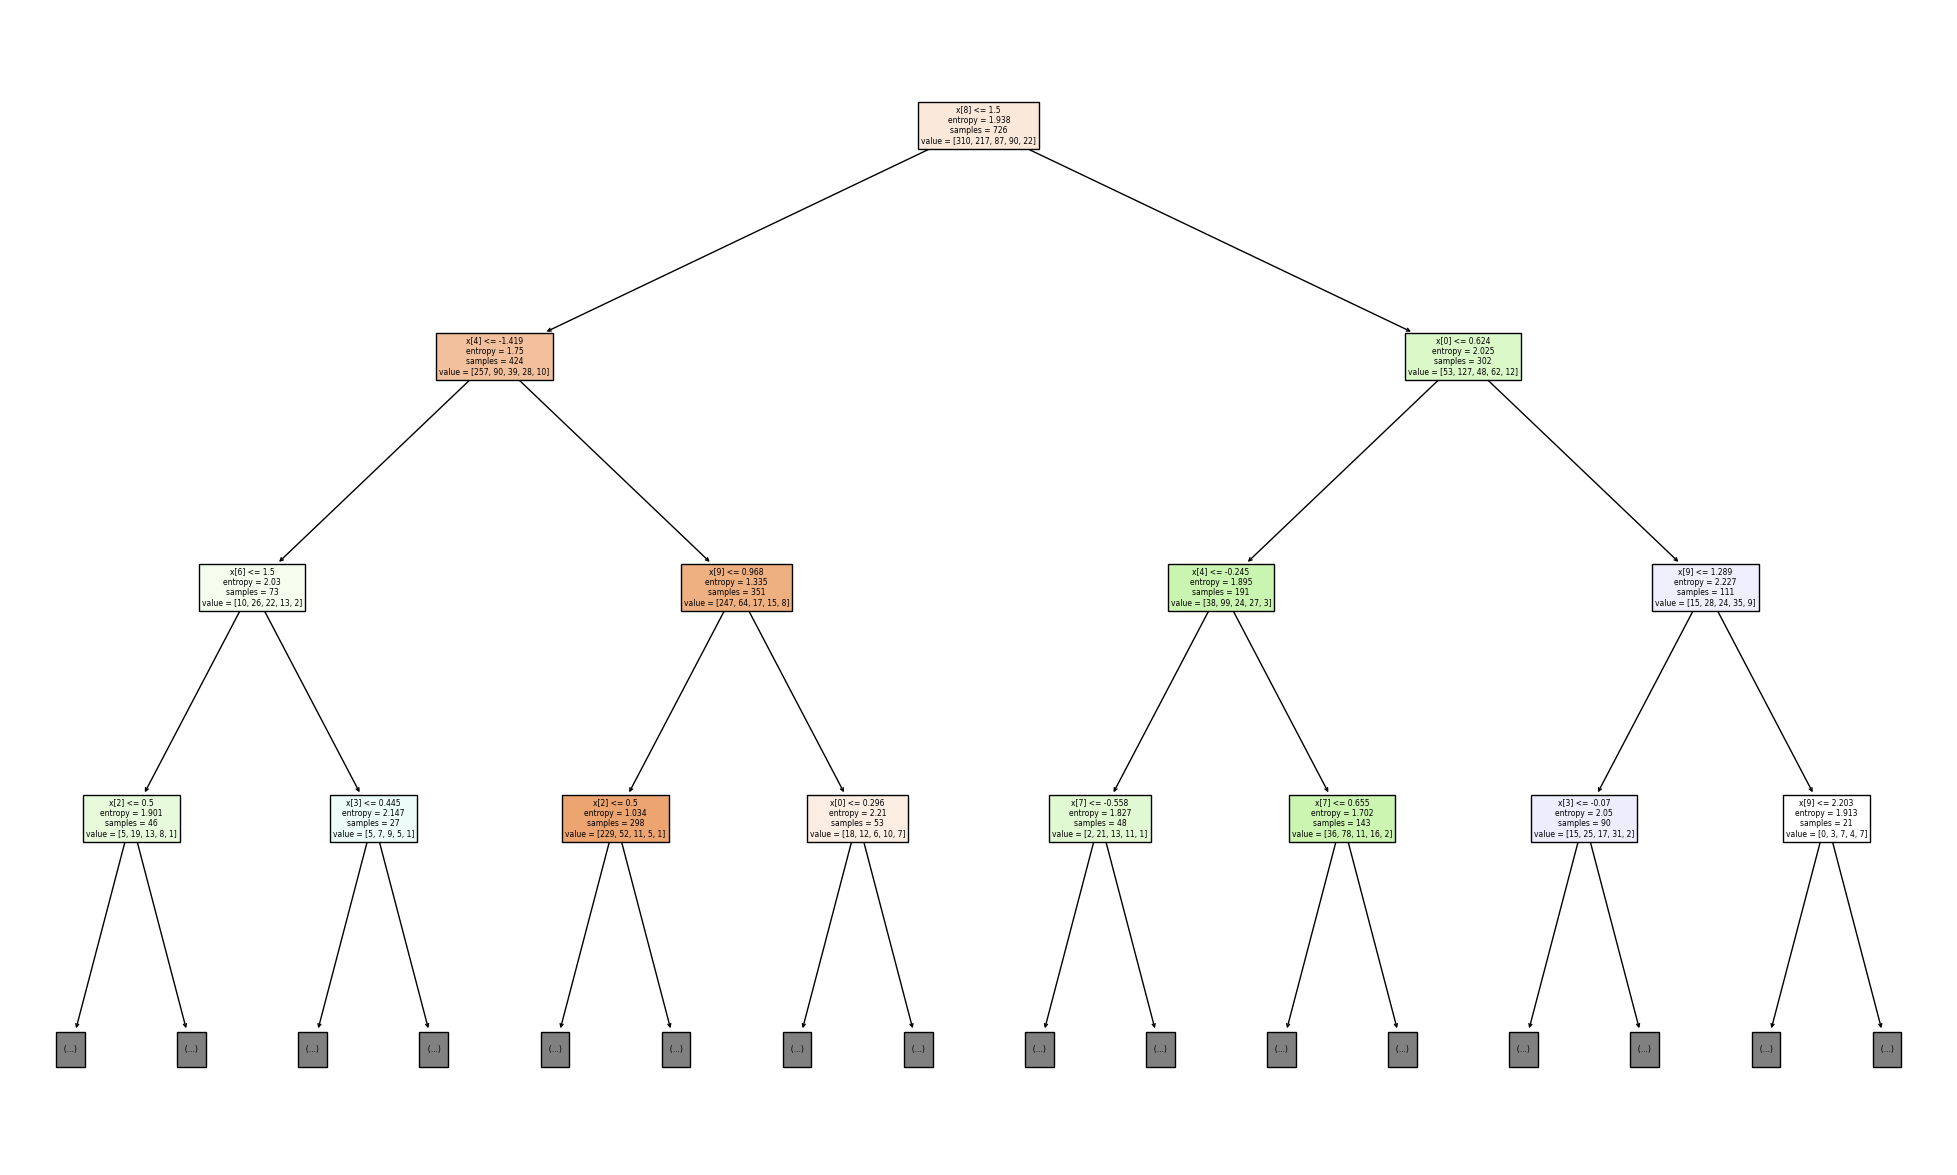

In [170]:
plt.figure(figsize=(25,15))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

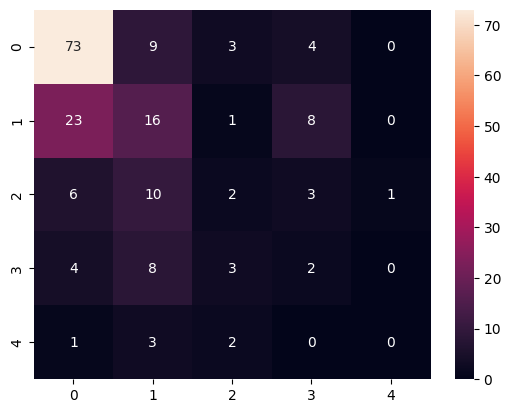

In [172]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        89
           1       0.35      0.33      0.34        48
           2       0.18      0.09      0.12        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.27      0.27      0.26       182
weighted avg       0.46      0.51      0.48       182

